<a href="https://colab.research.google.com/github/salim4n/Mes-Notebooks/blob/main/audio_speech_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets[audio] librosa transformers

In [2]:
from datasets import load_dataset

dataset = load_dataset("facebook/voxpopuli", name="fr", streaming=True)

In [4]:
ds_head = dataset['train'].take(3)

In [5]:
example = list(ds_head)[-1]
example

{'audio_id': '20101124-0900-PLENARY-93-fr_20101124-22:03:52_2',
 'language': 2,
 'audio': {'path': 'train_part_0/20101124-0900-PLENARY-93-fr_20101124-22:03:52_2.wav',
  'array': array([-0.00088501, -0.00619507, -0.00302124, ..., -0.00537109,
          0.00131226,  0.00106812]),
  'sampling_rate': 16000},
 'raw_text': 'Cette régulation concerne les États et leurs économies, mais évidemment, les principaux acteurs économiques sont les entreprises et, en particulier, les entreprises multinationales, qui sont les principales actrices du commerce mondial.',
 'normalized_text': 'cette régulation concerne les états et leurs économies mais évidemment les principaux acteurs économiques sont les entreprises et en particulier les entreprises multinationales qui sont les principales actrices du commerce mondial.',
 'gender': 'male',
 'speaker_id': '4318',
 'is_gold_transcript': True,
 'accent': 'None'}

In [6]:
# Listen to the example's audio

from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)

[]

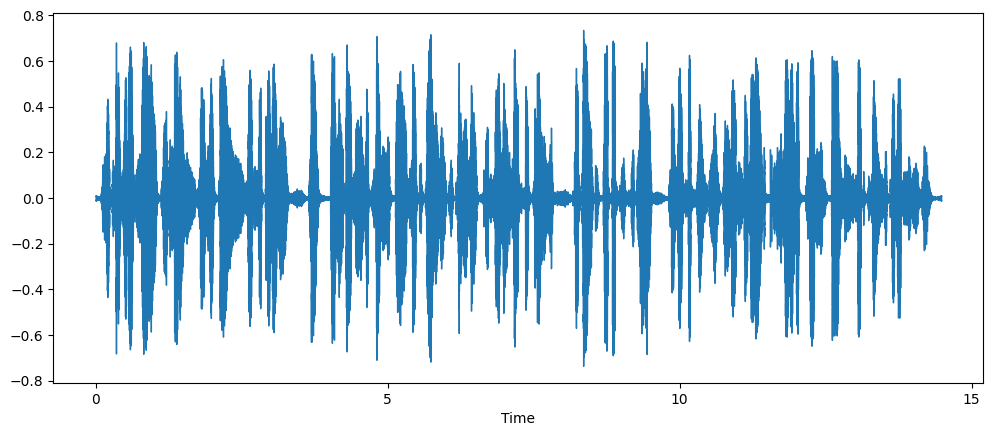

In [8]:
# Waveform

import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)
plt.plot()

[]

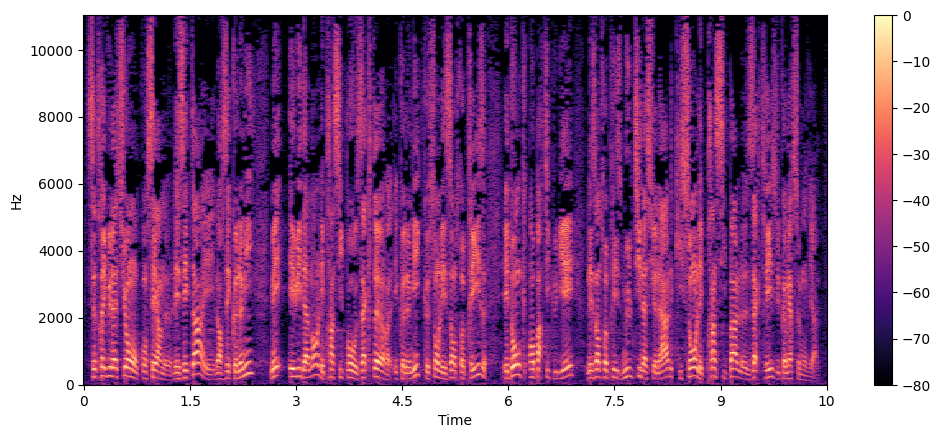

In [9]:
# Spectrogram

import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()
plt.plot()

In [10]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition", model="openai/whisper-large-v3")

config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

In [11]:
# Compare the results

print(pipe(example["audio"]["array"]))
print(example["raw_text"])

{'text': ' Cette régulation concerne les États et leurs économies, mais évidemment les principaux acteurs économiques que sont les entreprises, et donc en particulier les entreprises multinationales qui sont les principales actrices du commerce mondial.'}
Cette régulation concerne les États et leurs économies, mais évidemment, les principaux acteurs économiques sont les entreprises et, en particulier, les entreprises multinationales, qui sont les principales actrices du commerce mondial.


In [12]:
# Once again, listen to compare. Even though the output doesn't match exactly the provided transcription, the model actually does really well.
# You don't really hear the "Denn es gibt bio" part in the Audio.

from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)